In [1]:
# !pip install wheel cupy numpy

In [27]:
# The dataset consists of 3 drones, and 1 background
#!ls data/DroneRF
#!tree data/backgroundrfactivities
!tree data/DroneRF

data/DroneRF
├── ardrone
│   └── ardrone_pure_FFT
├── backgroundrfactivities
│   ├── 00000H_0.csv
│   ├── 00000H_10.csv
│   ├── 00000H_11.csv
│   ├── 00000H_12.csv
│   ├── 00000H_13.csv
│   ├── 00000H_14.csv
│   ├── 00000H_15.csv
│   ├── 00000H_16.csv
│   ├── 00000H_17.csv
│   ├── 00000H_18.csv
│   ├── 00000H_19.csv
│   ├── 00000H_1.csv
│   ├── 00000H_20.csv
│   ├── 00000H_21.csv
│   ├── 00000H_22.csv
│   ├── 00000H_23.csv
│   ├── 00000H_24.csv
│   ├── 00000H_25.csv
│   ├── 00000H_26.csv
│   ├── 00000H_27.csv
│   ├── 00000H_28.csv
│   ├── 00000H_29.csv
│   ├── 00000H_2.csv
│   ├── 00000H_30.csv
│   ├── 00000H_31.csv
│   ├── 00000H_32.csv
│   ├── 00000H_33.csv
│   ├── 00000H_34.csv
│   ├── 00000H_35.csv
│   ├── 00000H_36.csv
│   ├── 00000H_37.csv
│   ├── 00000H_38.csv
│   ├── 00000H_39.csv
│   ├── 00000H_3.csv
│   ├── 00000H_40.csv
│   ├── 00000H_4.csv
│   ├── 00000H_5.csv
│   ├── 00000H_6.csv
│   ├── 00000H_7.csv
│   ├── 00000H_8.csv
│   ├── 00000H_9.csv
│   ├── 00000L_0.csv
│   ├── 00

## Format
10100H_0.csv is the format for each segment. The filename represents the metadata, described as follows.
<img src="codes.png" alt="codes" style="width: 400px;"/>

<b>101</b>00H_0.csv

First three numbers in the filename represents the drone mode.
- Background: 000
- ardrone: 101
- bepopdrone: 100
- phantomdrone: 110


101<b>00</b>H_0.csv

4th and 5th number represents a binary for mode. There are a total of 4 modes. Available modes are 
- 1: 'On and Connected',
- 2: 'Hovering Automatically',
- 3: 'Flying no recording',
- 4: 'Flying and recording'

10100<b>H</b>_0.csv

6th character is either a H or L, the data is cut into 2 halves of 1 mil samples each.

10100H_<b>0</b>.csv

The character after the underscore represents the segment number

In [3]:
!tree data/DroneRF

data/DroneRF
├── ardrone
│   ├── 10100H_0.csv
│   ├── 10100H_10.csv
│   ├── 10100H_11.csv
│   ├── 10100H_12.csv
│   ├── 10100H_13.csv
│   ├── 10100H_14.csv
│   ├── 10100H_15.csv
│   ├── 10100H_16.csv
│   ├── 10100H_17.csv
│   ├── 10100H_18.csv
│   ├── 10100H_19.csv
│   ├── 10100H_1.csv
│   ├── 10100H_20.csv
│   ├── 10100H_2.csv
│   ├── 10100H_3.csv
│   ├── 10100H_4.csv
│   ├── 10100H_5.csv
│   ├── 10100H_6.csv
│   ├── 10100H_7.csv
│   ├── 10100H_8.csv
│   ├── 10100H_9.csv
│   ├── 10100L_0.csv
│   ├── 10100L_10.csv
│   ├── 10100L_11.csv
│   ├── 10100L_12.csv
│   ├── 10100L_13.csv
│   ├── 10100L_14.csv
│   ├── 10100L_15.csv
│   ├── 10100L_16.csv
│   ├── 10100L_17.csv
│   ├── 10100L_18.csv
│   ├── 10100L_19.csv
│   ├── 10100L_1.csv
│   ├── 10100L_20.csv
│   ├── 10100L_2.csv
│   ├── 10100L_3.csv
│   ├── 10100L_4.csv
│   ├── 10100L_5.csv
│   ├── 10100L_6.csv
│   ├── 10100L_7.csv
│   ├── 10100L_8.csv
│   ├── 10100L_9.csv
│   ├── 10101H_0.csv
│   ├── 10101H_10.csv
│   ├── 10101H_11.csv
│   ├─

In [4]:
#A typical file size of each csv is around 90M. We need an efficient way to process this.
!ls -llh data/DroneRF/ardrone/*

-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_0.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_10.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_11.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_12.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_13.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_14.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_15.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_16.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_17.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_18.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_19.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_1.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_20.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 d

In [2]:
#Loading one segment for analysis
import numpy as np
ardrone_segment_18_h=np.loadtxt('/home/jax/projects/signals/ardrone/10100H_18.csv', delimiter=",")
ardrone_segment_18_l=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_18.csv', delimiter=",")
ardrone_segment_9_h=np.loadtxt('/home/jax/projects/signals/ardrone/10100H_9.csv', delimiter=",")
ardrone_segment_9_l=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_9.csv', delimiter=",")

print("ARDrone Segment 18 L consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_l.shape[0],min(ardrone_segment_18_l),max(ardrone_segment_18_l)))
print("ARDrone Segment 18 H consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_h.shape[0],min(ardrone_segment_18_h),max(ardrone_segment_18_h)))

print("ARDrone Segment 9 L consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_9_l.shape[0],min(ardrone_segment_9_l),max(ardrone_segment_9_l)))
print("ARDrone Segment 9 H consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_9_h.shape[0],min(ardrone_segment_9_h),max(ardrone_segment_9_h)))

ARDrone Segment 18 L consists of 10000000 freq samples with a min/max of -8338.0/8213.0
ARDrone Segment 18 H consists of 10000000 freq samples with a min/max of -220.0/182.0
ARDrone Segment 9 L consists of 10000000 freq samples with a min/max of -7892.0/8376.0
ARDrone Segment 9 H consists of 10000000 freq samples with a min/max of -206.0/203.0


In [30]:
print("Each segment consists of a upper and lower freq range, specifically")
print("2.4Ghz to 2.44Ghz and\n2.44Ghz to 2.48Ghz\n")
print("This means each sample is seperated by {0} hz".format(40*1000000/ardrone_segment_18_l.shape[0]))

Each segment consists of a upper and lower freq range, specifically
2.4Ghz to 2.44Ghz and
2.44Ghz to 2.48Ghz

This means each sample is seperated by 4.0 hz


In [33]:
!cd /home/jax/projects/signals/ && ls

ardrone  bebopdrone  phantomdrone


So it would seem that for AR Drone, a L segment has a much larger amplitude variation compared to a H segment for the same mode. Lets do a check for bepopdrone.

In [34]:
#Loading one segment for analysis
import numpy as np
bepopdrone_segment_18_h=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011H_18.csv', delimiter=",")
bepopdrone_segment_18_l=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011L_18.csv', delimiter=",")
bepopdrone_segment_9_h=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011H_9.csv', delimiter=",")
bepopdrone_segment_9_l=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011L_9.csv', delimiter=",")

print("bepop drone Segment 18 L consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_18_l.shape[0],min(bepopdrone_segment_18_l),max(bepopdrone_segment_18_l)))
print("bepop drone Segment 18 H consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_18_h.shape[0],min(bepopdrone_segment_18_h),max(bepopdrone_segment_18_h)))

print("bepop drone Segment 9 L consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_9_l.shape[0],min(bepopdrone_segment_9_l),max(bepopdrone_segment_9_l)))
print("bepop drone Segment 9 H consists of {0}   freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_9_h.shape[0],min(bepopdrone_segment_9_h),max(bepopdrone_segment_9_h)))

bepop drone Segment 18 L consists of 10000000 freq samples with a min/max of -8964.0/9546.0
bepop drone Segment 18 H consists of 10000000 freq samples with a min/max of -243.0/234.0
bepop drone Segment 9 L consists of 10000000 freq samples with a min/max of -11469.0/11446.0
bepop drone Segment 9 H consists of 10000000   freq samples with a min/max of -245.0/235.0


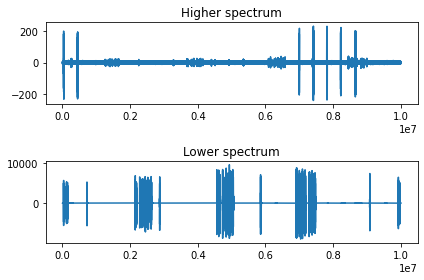

In [35]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(bepopdrone_segment_18_h)
axs[0].set_title('Higher spectrum')
axs[1].plot(bepopdrone_segment_18_l)
axs[1].set_title('Lower spectrum')
fig.tight_layout()

The lower spectrum has larger amplitude variation from higher spectrum

Now lets take a look at same drone, same spectrum and segment but a different code.

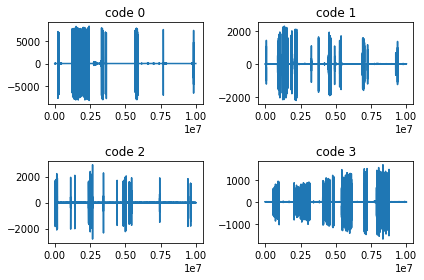

In [36]:
import numpy as np
ardrone_segment_18_l_code0=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_8.csv', delimiter=",")
ardrone_segment_18_l_code1=np.loadtxt('/home/jax/projects/signals/ardrone/10101L_8.csv', delimiter=",")
ardrone_segment_18_l_code2=np.loadtxt('/home/jax/projects/signals/ardrone/10110L_8.csv', delimiter=",")
ardrone_segment_18_l_code3=np.loadtxt('/home/jax/projects/signals/ardrone/10111L_8.csv', delimiter=",")

fig, axs = plt.subplots(2,2)
axs[0][0].plot(ardrone_segment_18_l_code0)
axs[0][0].set_title('code 0')
axs[0][1].plot(ardrone_segment_18_l_code1)
axs[0][1].set_title('code 1')

axs[1][0].plot(ardrone_segment_18_l_code2)
axs[1][0].set_title('code 2')

axs[1][1].plot(ardrone_segment_18_l_code3)
axs[1][1].set_title('code 3')


fig.tight_layout()

The signals demonstrated from different codes showed that they are highly distinguishable. Now lets look at same codes from different segments.

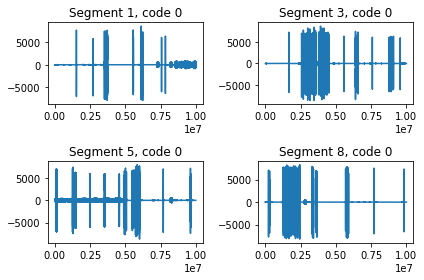

In [37]:
ardrone_segment_1_l_code0=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_1.csv', delimiter=",")
ardrone_segment_3_l_code0=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_3.csv', delimiter=",")
ardrone_segment_5_l_code0=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_5.csv', delimiter=",")
ardrone_segment_8_l_code0=np.loadtxt('/home/jax/projects/signals/ardrone/10100L_8.csv', delimiter=",")

fig, axs = plt.subplots(2,2)
axs[0][0].plot(ardrone_segment_1_l_code0)
axs[0][0].set_title('Segment 1, code 0')
axs[0][1].plot(ardrone_segment_3_l_code0)
axs[0][1].set_title('Segment 3, code 0')

axs[1][0].plot(ardrone_segment_5_l_code0)
axs[1][0].set_title('Segment 5, code 0')

axs[1][1].plot(ardrone_segment_8_l_code0)
axs[1][1].set_title('Segment 8, code 0')


fig.tight_layout()

In [38]:
# !unrar x 'data/DroneRF/backgroundrfactivities/RF Data_00000_H1.rar'
# !mv *.csv data/DroneRF/backgroundrfactivities
# !cd  data/DroneRF/backgroundrfactivities && ls


Objective: Creating the same time domain plot as shown on the paper
- Background RF activities Segment 5 (Time Domain)
- Bepopdrone Flying and Video Recording Segment 10 (Time Domain)
- Phantom Drone On and Connected Segment 7 (Time Domain)

BackGround RF activities Segment 5 (Time Domain)


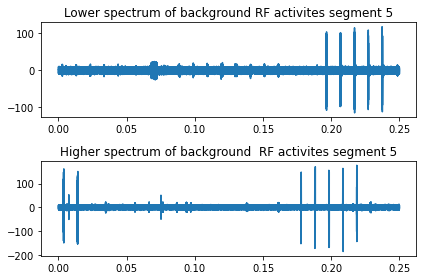

In [40]:
import numpy as np
backgroundrfactivities_segment_5_H1=np.loadtxt('data/DroneRF/backgroundrfactivities/00000H_5.csv', delimiter=",")
backgroundrfactivities_segment_5_L1=np.loadtxt('data/DroneRF/backgroundrfactivities/00000L_5.csv', delimiter=",")

time = 0.25 
Fs = len(backgroundrfactivities_segment_5_H1)/time # 40 million Hz
t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[1].plot(t,backgroundrfactivities_segment_5_H1)
axs[1].set_title('Higher spectrum of background  RF activites segment 5')
axs[0].plot(t,backgroundrfactivities_segment_5_L1)
axs[0].set_title('Lower spectrum of background RF activites segment 5')
fig.tight_layout()

Bepopdrone Flying and Video Recording Segment 10 ( Time domain )

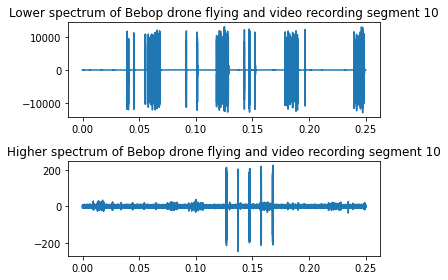

In [42]:
import numpy as np
Bebop_flying_videorecording_segment_10_H1=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011H_10.csv', delimiter=",")
Bebop_flying_videorecording_segment_10_L1=np.loadtxt('/home/jax/projects/signals/bebopdrone/10011L_10.csv', delimiter=",")


Fs = len(backgroundrfactivities_segment_5_H1)/time # 40 million Hz

t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[1].plot(t,Bebop_flying_videorecording_segment_10_H1)
axs[1].set_title('Higher spectrum of Bebop drone flying and video recording segment 10')
axs[0].plot(t,Bebop_flying_videorecording_segment_10_L1)
axs[0].set_title('Lower spectrum of Bebop drone flying and video recording segment 10')
fig.tight_layout()

Phantom Drone On and Connected Segment 7 (Time Domain)

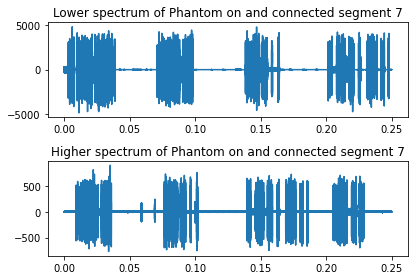

In [3]:
import numpy as np
phantom_on_and_connected_segment_7_H1=np.loadtxt('data/DroneRF/phantomdrone/11000H_7.csv', delimiter=",")
phantom_on_and_connected_segment_7_L1=np.loadtxt('data/DroneRF/phantomdrone/11000L_7.csv', delimiter=",")

time = 0.25 # 40million sample in 1 seconds
Fs = len(backgroundrfactivities_segment_5_H1)/time # 40 million Hz
t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[1].plot(t,phantom_on_and_connected_segment_7_H1)
axs[1].set_title('Higher spectrum of Phantom on and connected segment 7')
axs[0].plot(t,phantom_on_and_connected_segment_7_L1)
axs[0].set_title('Lower spectrum of Phantom on and connected segment 7')
fig.tight_layout()

Simulating how FFT operates using a sine wave

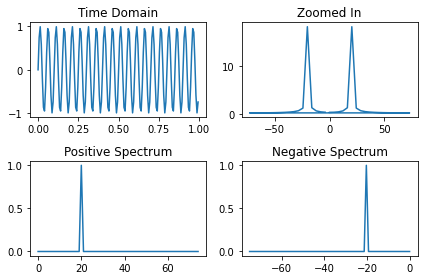

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

Fs = 150 
t= np.arange(0,1,1/Fs)
f = 20 # Hz

x = np.sin(2*np.pi*20*t)#+0.5*np.sin(2*np.pi*40*t)+1.5*np.sin(2*np.pi*5*t)

t = np.arange(0,1,1/Fs)
t_zoomed= np.arange(0,0.5,1/Fs)

n = np.size(t)
n_zoomed = np.size(t_zoomed)


fr_positive = (Fs/2)*np.linspace(0,1,n//2)
fr_negative =(Fs/2)*np.linspace(0,-1,n//2)

fft_fr = syfp.fftfreq(len(x[0:37]),1/Fs)

#compute FFT
x_fft =fft(x)
x_m = (2/n)* abs(x_fft[0:np.size(fr_positive)])

x_fft_zoomed =fft(x[0:37])

'''
plt.subplot(2,1,1)
plt.plot(t,x)
plt.title("Sinsodial Signal Time domain")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

plt.subplot (2,1,1)
plt.plot(fft_fr,np.abs(x_fft))
plt.title("Positive Magnitude Spectrum")
plt.xlabel('Positive Frequency(Hz)')
plt.ylabel('Magnitude')


plt.subplot (2,1,1)
plt.plot(fr_positive,x_m)
plt.title("Positive Magnitude Spectrum")
plt.xlabel('Positive Frequency(Hz)')
plt.ylabel('Magnitude')

plt.subplot (2,1,2)
plt.plot(fr_negative,x_m)
plt.title("Negative Magnitude Spectrum")
plt.xlabel('Negative Frequency(Hz)')
plt.ylabel('Magnitude')
'''

fig, axs = plt.subplots(2,2)

axs[0][0].plot(t,x)
axs[0][0].set_title('Time Domain')

axs[0][1].plot(fft_fr,np.abs(x_fft_zoomed))
axs[0][1].set_title('Zoomed In')


axs[1][0].plot(x_m)
axs[1][0].set_title('Positive Spectrum')

axs[1][1].plot(fr_negative,x_m)
axs[1][1].set_title('Negative Spectrum')


plt.tight_layout()


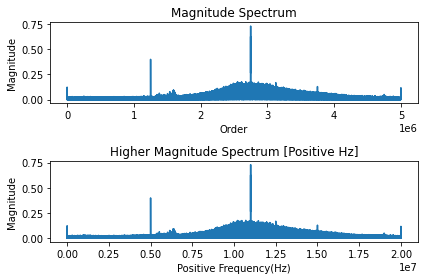

In [47]:
import numpy as np 
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

phantom_on_seg_7_H1=np.loadtxt('/home/jax/projects/signals/phantomdrone/11000H_7.csv', delimiter=",")
phantom_on_seg_7_L1=np.loadtxt('/home/jax/projects/signals/phantomdrone/11000L_7.csv', delimiter=",")


time = 0.25 # 40million sample in 1 seconds
Fs = len(phantom_on_seg_7_H1)/time # 40 million Hz
t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step
'''
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(t,phantom_on_seg_7_H1)
plt.title("Signal Time domain")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
'''
n = np.size(t)

fr = (Fs/2)*np.linspace(0,1,n//2) 

#highest frequncy = 40Mhz , the bandwidth

#Sampling Frequency,Fs must be > 2 times of the highest frequncy component
#Highest frequncy component will be Fs/2 at minimum

#n//2 : extract the positive component of the signal

mean_of_phantom_H = np.mean(phantom_on_seg_7_H1) # Removing any DC Offset

x_H = fft((phantom_on_seg_7_H1-mean_of_phantom_H))

x_H_abs = (2/n)*abs(x_H[0:np.size(fr)])

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(x_H_abs)
plt.title("Magnitude Spectrum")
plt.xlabel('Order')
plt.ylabel('Magnitude')

import matplotlib.pyplot as plt
plt.subplot (2,1,2)
plt.plot(fr,x_H_abs)
plt.title("Higher Magnitude Spectrum [Positive Hz]")
plt.xlabel('Positive Frequency(Hz)')
plt.ylabel('Magnitude')



plt.tight_layout()




Text(0, 0.5, 'Magnitude')

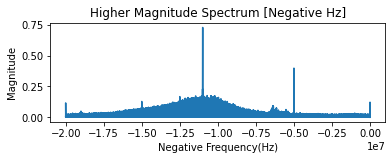

In [48]:
fr_negative = (Fs/2)*np.linspace(0,-1,n//2) 

import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(fr_negative,x_H_abs)
plt.title("Higher Magnitude Spectrum [Negative Hz]")
plt.xlabel('Negative Frequency(Hz)')
plt.ylabel('Magnitude')


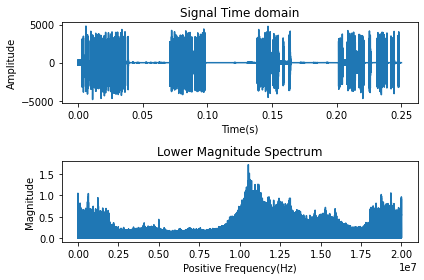

In [49]:
plt.subplot(2,1,1)
plt.plot(t,phantom_on_seg_7_L1)
plt.title("Signal Time domain")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

mean_of_phantom_L = np.mean(phantom_on_seg_7_L1)

y_L = fft(phantom_on_seg_7_L1-mean_of_phantom_L)
y_L_abs = (2/n) * abs(y_L[0:np.size(fr)])


plt.subplot (2,1,2)
plt.plot(fr,y_L_abs)
plt.title("Lower Magnitude Spectrum")
plt.xlabel('Positive Frequency(Hz)')
plt.ylabel('Magnitude')


plt.tight_layout()

Text(0, 0.5, 'Magnitude')

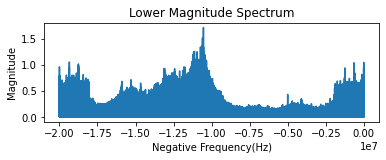

In [50]:
plt.subplot (2,1,1)
plt.plot(fr_negative,y_L_abs)
plt.title("Lower Magnitude Spectrum")
plt.xlabel('Negative Frequency(Hz)')
plt.ylabel('Magnitude')


Close up view of the spectrum

[0.000000e+00 2.000002e+01 4.000004e+01 ... 1.999996e+07 1.999998e+07
 2.000000e+07]
[  0.       19.99999  39.99998 ... -59.99997 -39.99998 -19.99999]


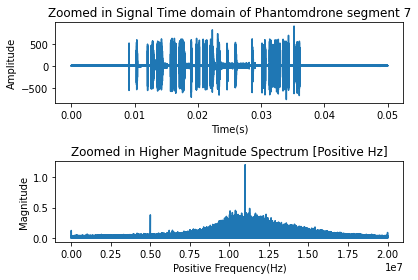

In [7]:
import numpy as np 
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

phantom_on_seg_7_H1=np.loadtxt('/home/jax/projects/signals/phantomdrone/11000H_7.csv', delimiter=",")

time_zoom = 0.25# 40million sample in 1 seconds
Fs_zoom = len(phantom_on_seg_7_H1)/time_zoom 
t_zoom = np.arange(0,0.05,1/Fs_zoom) # 1/Fs = Time for each step


n = np.size(t_zoom)

fr = (Fs_zoom/2)*np.linspace(0,1,n//2) 
freqs = syfp.fftfreq(len(phantom_on_seg_7_H1[0:2000001]),1/Fs_zoom)

mean_of_phantom_H_zoomed = np.mean(phantom_on_seg_7_H1[0: 2000001]) # Removing any DC Offset
x_H = fft((phantom_on_seg_7_H1[0: 2000001]-mean_of_phantom_H_zoomed))
x_H_abs = (2/n)*abs(x_H[0:np.size(fr)])
#x_H_abs = (2/n)*abs(x_H) #Unhcheck this if want to use freqs to plot [ Both freqs or fr should give the same answer]

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(t_zoom,phantom_on_seg_7_H1[0: 2000001])
plt.title("Zoomed in Signal Time domain of Phantomdrone segment 7")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')



import matplotlib.pyplot as plt
plt.subplot (2,1,2)
plt.plot(fr,x_H_abs)
plt.title("Zoomed in Higher Magnitude Spectrum [Positive Hz]")
plt.xlabel('Positive Frequency(Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
print(fr)

print(freqs)


Text(0, 0.5, 'Magnitude')

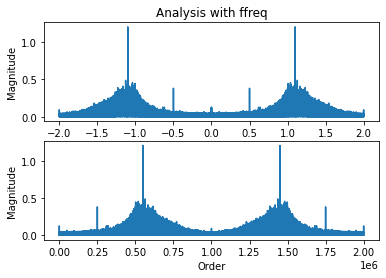

In [8]:
x_H_abs_ffreq = (2/n)*abs(x_H)


import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(freqs,x_H_abs_ffreq) # in frequencies 
plt.title("Analysis with ffreq")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')


import matplotlib.pyplot as plt
plt.subplot(2,1,2)
plt.plot(x_H_abs_ffreq) #in order for X_axis  
plt.xlabel('Order')
plt.ylabel('Magnitude')




Concatenate both L and H spectrums using the normalised equation:

- [xf ; (yf*mean(xf((end-Q+1):end))./mean(yf(1:Q)))];



- The output is concatenating the <b>Positive(+ve)</b> side of the <u>Lower spectrum</u> with the <b>Negative(-ve)</b> side of the <u>Higher Spectrum</u>



- Carrier Frequency of Lower Spectrum : +2420 MHz or +2422 MHz (Choose the latter for convinient sake )



- Carrier Frequenct of Higher Spectrum : +2460 MHz or +2462 MHz



- BandWidth for each spectrum : 40Mhz


                

(1000000,)


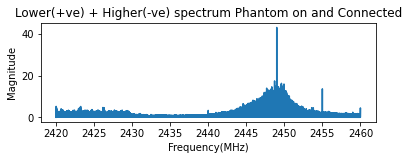

In [55]:

x_H_abs = (2/n) * abs(x_H[0:np.size(fr)])
y_L_abs = (2/n) * abs(y_L[0:np.size(fr)])
Q = 10 # number of returning points for spectral continuity

#equation_from_paper xf = low , yf = high [ Low , High]

mean_Low = np.mean(y_L_abs[-Q-1:-1])
mean_High= np.mean(x_H_abs[0:Q])

Normalising_factor= mean_Low/mean_High

x_H_abs_normalised = (2/n) * abs(x_H[0:np.size(fr)]) * Normalising_factor

#concatenate the H and L

Full_spectrum = np.concatenate((y_L_abs,x_H_abs_normalised ),axis=0)

Center_frequency_Lower = 2420
Center_frequency_Upper = 2460

fr_full_L  = ((Fs/2)*np.linspace(0,1,n//2))/1e6
fr_full_H  = ((Fs/2)*np.linspace(0,-1,n//2))/1e6

fr_full = np.concatenate((fr_full_L+ Center_frequency_Lower,fr_full_H + Center_frequency_Upper),axis =0)

import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(fr_full,Full_spectrum)
plt.title("Lower(+ve) + Higher(-ve) spectrum Phantom on and Connected")
plt.xlabel('Frequency(MHz)')
plt.ylabel('Magnitude')

print(x_H_abs.shape)



Output is concatenating the <b>Full Spectrum(+ve)</b> of the <u>Lower spectrum</u> with the <b>Full Spectrum</b> side of the <u>Higher Spectrum</u>


[2420.      2419.99998 2419.99996 ... 2439.99996 2439.99998 2440.     ]


Text(0, 0.5, 'Magnitude')

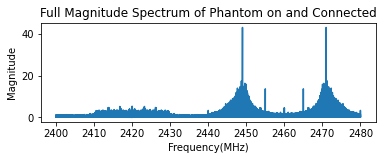

In [56]:
import numpy as np

Center_frequency_Lower = 2420
Center_frequency_Upper = 2460

fr_full_L_positive  = ((Fs/2)*np.linspace(0,1,n//2))/1e6
fr_full_L_negative  = ((Fs/2)*np.linspace(0,-1,n//2))/1e6
fr_full_L = np.concatenate((fr_full_L_negative + Center_frequency_Lower ,fr_full_L_positive + Center_frequency_Lower),axis = 0)
fr_full_L_fft = np.concatenate((y_L_abs,y_L_abs),axis = 0)


fr_full_H_positive  = ((Fs/2)*np.linspace(0,1,n//2))/1e6
fr_full_H_negative  = ((Fs/2)*np.linspace(0,-1,n//2))/1e6
fr_full_H = np.concatenate((fr_full_H_negative+Center_frequency_Upper,fr_full_H_positive+Center_frequency_Upper),axis = 0)
fr_full_H_fft = np.concatenate((x_H_abs_normalised,x_H_abs_normalised),axis = 0)

Full_spectrum = np.concatenate((fr_full_L_fft,fr_full_H_fft),axis=0)
fr_full = np.concatenate((fr_full_L,fr_full_H),axis =0)

print(fr_full_L)


import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(fr_full,Full_spectrum)
plt.title("Full Magnitude Spectrum of Phantom on and Connected")
plt.xlabel('Frequency(MHz)')
plt.ylabel('Magnitude')



Using scipy function, fftfreq to generate the relative frequency component of the dataset 


** One flaw: fftfreq caused a linear line to be plotted on the Lower spectrum dataset

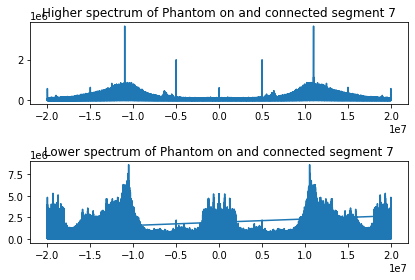

In [57]:
#n = np.size(duration)

fr = (Fs/2)*np.linspace(0,1,n//2)


yf_H =np.fft.fft(phantom_on_seg_7_H1)
yf_L =np.fft.fft(phantom_on_seg_7_L1)

#fftfreq = np.fft.fftfreq(len(phantom_on_seg_7_H1[0:N]))

freqs_H = syfp.fftfreq(len(phantom_on_seg_7_H1),1/Fs)

freqs_L = syfp.fftfreq(len(phantom_on_seg_7_L1),1/Fs)


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(freqs_H,np.abs(yf_H))
axs[0].set_title('Higher spectrum of Phantom on and connected segment 7')

axs[1].plot(freqs_L,np.abs(yf_L))
axs[1].set_title('Lower spectrum of Phantom on and connected segment 7')

fig.tight_layout()

Performing FFT on different Drone's Raw Dataset. The output will be save on another .csv file

<b> Three Type of Data Sets for each drone type </b>

- Immediate FFT results



In [14]:
# This is a snippet of the how to save FFT into a whole dataset

import numpy as np

BUI = [0]*1
BUI[0]= '11000'

Drones = {0:'phantomdrone'}

counter = 0
L = 1e5
Q = 10

for k in range(6,9):
        #print('data/DroneRF/'+ str(Drones[0]) +'/' + str(BUI[0]) +'H_'+str(k)+'.csv')
        #/home/jax/projects/signals/phantomdrone/
        
        x_H=np.loadtxt('/home/jax/projects/signals/'+ str(Drones[0]) +'/' + str(BUI[0]) +'H_'+ str(k)+'.csv', delimiter=",")
        y_L=np.loadtxt('/home/jax/projects/signals/'+ str(Drones[0]) +'/' + str(BUI[0]) +'L_'+ str(k)+'.csv', delimiter=",")
        
        time = 0.25
        Fs = len(x_H)/time #sampling Frequency
        freq_time = np.arange(0,0.25,1/Fs)
        print('Hi')
        
        n_size = np.size(freq_time) #10 million steps or 10million samples in 0.25 seconds
        fr = (Fs/2)*np.linspace(0,1,n_size//2)\
        
        Q = 10 # number of returning points for spectral continuity

        #equation_from_paper xf = low , yf = high [ Low , High]
        
        mean_of_x_H = np.mean(x_H)
        x_H_fft = fft((x_H-mean_of_x_H))
        x_H_fft_abs = (2/n)*abs(x_H_fft[0:np.size(fr)])
        
        mean_of_y_L = np.mean(y_L)
        y_L_fft = fft((y_L-mean_of_y_L))
        y_L_fft_abs = (2/n)*abs(y_L_fft[0:np.size(fr)])
        
        mean_Low = np.mean(y_L_fft_abs[-Q-1:-1])
        mean_High= np.mean(x_H_fft_abs[0:Q])
        
        Normalising_factor= mean_Low/mean_High
        
        x_H_fft_abs_normalised = x_H_fft_abs * Normalising_factor

        Full_spectrum = np.concatenate((y_L_fft_abs,x_H_fft_abs_normalised ),axis=0)
        

        #save_x_H =np.savetxt('data/DroneRF/'+ str(Drones[0]) +'/' + 'phantomdrone_pure_FFT'+'/' + str(BUI[0]) +'H_FFT_'+ str(k)+'.csv',x_H_fft_abs, delimiter=",")
        save_L_H =np.savetxt('data/DroneRF/'+ str(Drones[0]) +'/' + 'phantomdrone_pure_FFT'+'/' + str(BUI[0]) +'_FFT_concatenate'+ str(k)+'.csv',Full_spectrum, delimiter=",")
        counter = counter + 1
        print(counter)
print('END')




Hi
1
Hi
2
Hi
3
END


In [152]:
#!cd data/DroneRF/ardrone && mkdir ardrone_pure_FFT
#!cd data/DroneRF/phantomdrone && mkdir phantomdrone_pure_FFT
#!cd data/DroneRF/backgroundrfactivities && mkdir backgroundrfactivities_pure_FFT
#!cd data/DroneRF/bepopdrone && mkdir bepopdrone_pure_FFT

In [16]:
#Testing Loading from directory [High Spectrum]
hello = np.loadtxt('data/DroneRF/'+ 'phantomdrone' +'/'+'phantomdrone_pure_FFT' + '/' + '11000_FFT_concatenate7.csv', delimiter=",")

(1000000,)


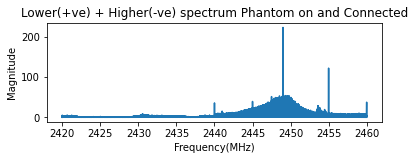

In [18]:
time = 0.25 # 40million sample in 1 seconds
Fs = len(phantom_on_seg_7_H1)/time # 40 million Hz
t = np.arange(0,0.25,1/Fs) # 1/Fs = Time for each step

n = np.size(t)

Center_frequency_Lower = 2420
Center_frequency_Upper = 2460

fr_full_L  = ((Fs/2)*np.linspace(0,1,n//2))/1e6
fr_full_H  = ((Fs/2)*np.linspace(0,-1,n//2))/1e6

fr_full = np.concatenate((fr_full_L+ Center_frequency_Lower,fr_full_H + Center_frequency_Upper),axis =0)

import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(fr_full,hello)
plt.title("Lower(+ve) + Higher(-ve) spectrum Phantom on and Connected")
plt.xlabel('Frequency(MHz)')
plt.ylabel('Magnitude')

print(x_H_abs.shape)

In [3]:
!ls data/DroneRF

ArdroneMode1.csv  RF_Data_FFT		  bepopdrone
ArdroneMode2.csv  ardrone		  phantomdrone
ArdroneMode3.csv  backgroundrfactivities  testing_FFT


In [55]:
import numpy as np

#parameters

BUI =[0]*8
BUI[0] = '00000' #BUI of RF background activities
BUI[1:4] = ['10000','10001','10010','10011'] #BUI of the Bebop drone RF activities
BUI[5:8] = ['10100','10101','10110','10111'] #BUI of the AR drone RF activities
BUI[9]='11000'#BUI of the Phantom drone RF activities

Drones = {0:'backgroundrfactivities', 1:'bebopdrone', 2:'bebopdrone', 3:'bebopdrone', 4:'bebopdrone' 
          , 5:'ardrone' , 6:'ardrone' ,7:'ardrone' ,8:'ardrone' , 9: 'phantomdrone'}

pure_FFT_folder = {0:'backgroundrfactivities_pure_FFT', 1:'bepopdrone_pure_FFT',2:'bepopdrone_pure_FFT',
                   3:'bepopdrone_pure_FFT',4:'bepopdrone_pure_FFT', 5:'ardrone_pure_FFT', 6:'ardrone_pure_FFT',
                   7:'ardrone_pure_FFT',8:'ardrone_pure_FFT', 9: 'phantomdrone_pure_FFT'}

M = 2048 #Total number of frequency bins
L = 1e5 #Total number samples in a segment
Q = 10 #Number of returning points for spectral continuity




In [63]:
for i in range (len(BUI)):
    flag = 1
    if BUI[i] == '00000':
        N = 41
        selected_drones = Drones[0]
    elif BUI[i] == '10111':
        N = 18
    else:
        N = 21
    data = []
    cnt = 1

    counter = 0 # for checking


    for j in range (N):
        counter = counter + 1
        if BUI[i] == '00000' :
            print('data/DroneRF/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv')
            x_H=np.loadtxt('data/DroneRF/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv', delimiter=",")
            y_L=np.loadtxt('data/DroneRF/'+ Drones[i] +'/' + str(BUI[i]) +'L_'+ str(j)+'.csv', delimiter=",")
            factor = int(len(x_H)/L)
        
        else:
            print('/home/jax/projects/signals/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv')
            x_H=np.loadtxt('/home/jax/projects/signals/'+ str(Drones[i]) +'/' + str(BUI[i]) +'H_'+ str(j)+'.csv', delimiter=",")
            y_L=np.loadtxt('/home/jax/projects/signals/'+ Drones[i] +'/' + str(BUI[i]) +'L_'+ str(j)+'.csv', delimiter=",")
            factor = int(len(x_H)/L)
            
        for k  in range(1,factor+1):
            start = int(1 + (k-1)*L)
            finish = int(k*L)
    
            xf = abs(np.fft.fftshift(fft(x_H[start:finish]-np.mean(x_H[start:finish]),M)))
            end_xf=xf.shape[0]
            xf=xf[int(end_xf/2):end_xf]

            yf = abs(np.fft.fftshift(fft(y_L[start:finish]-np.mean(y_L[start:finish]),M)))
            end_yf=yf.shape[0]
            yf=yf[int(end_yf/2):end_yf]
            normalisation_factor = np.divide((np.mean(xf[-Q-1:-1])),np.mean(yf[0:Q]))
            yf = yf*normalisation_factor
    
            xf = np.transpose(xf)
            yf = np.transpose(yf)
            xf_yf = np.r_[xf,yf]
    
            if flag == 1:
                data = xf_yf
                flag = 0
            else:
                data = np.c_[data,xf_yf]

                
        print(int(100*j/N))
        print(data.shape)
        
    Data=np.square(data)
    save_L_H =np.savetxt('data/DroneRF/' + 'testing_FFT'+'/'+str(BUI[i])+'_FFT_power.csv',Data, delimiter=",")
    #save=np.savetxt(Drones[k]+'_FFT_power.csv',Data,delimiter=',')
    print("Saving")
        
 
        


data/DroneRF/backgroundrfactivities/00000H_0.csv
0
(2048, 100)
data/DroneRF/backgroundrfactivities/00000H_1.csv
2
(2048, 200)
data/DroneRF/backgroundrfactivities/00000H_2.csv
4
(2048, 300)
data/DroneRF/backgroundrfactivities/00000H_3.csv
7
(2048, 400)
data/DroneRF/backgroundrfactivities/00000H_4.csv
9
(2048, 500)
data/DroneRF/backgroundrfactivities/00000H_5.csv
12
(2048, 600)
data/DroneRF/backgroundrfactivities/00000H_6.csv
14
(2048, 700)
data/DroneRF/backgroundrfactivities/00000H_7.csv
17
(2048, 800)
data/DroneRF/backgroundrfactivities/00000H_8.csv
19
(2048, 900)
data/DroneRF/backgroundrfactivities/00000H_9.csv
21
(2048, 1000)
data/DroneRF/backgroundrfactivities/00000H_10.csv
24
(2048, 1100)
data/DroneRF/backgroundrfactivities/00000H_11.csv
26
(2048, 1200)
data/DroneRF/backgroundrfactivities/00000H_12.csv
29
(2048, 1300)
data/DroneRF/backgroundrfactivities/00000H_13.csv
31
(2048, 1400)
data/DroneRF/backgroundrfactivities/00000H_14.csv
34
(2048, 1500)
data/DroneRF/backgroundrfactivitie

OSError: /home/jax/projects/signals/bebopdrone/10010L_0.csv not found.

In [ ]:
!cd /home/jax/projects/signals && ls

In [54]:
!cd /home/jax/projects/signals/bebopdrone && ls

10000H_0.csv   10000L_18.csv  10001H_7.csv   10010H_15.csv  10011H_4.csv
10000H_10.csv  10000L_19.csv  10001H_8.csv   10010H_16.csv  10011H_5.csv
10000H_11.csv  10000L_1.csv   10001H_9.csv   10010H_17.csv  10011H_6.csv
10000H_12.csv  10000L_20.csv  10001L_0.csv   10010H_18.csv  10011H_7.csv
10000H_13.csv  10000L_2.csv   10001L_10.csv  10010H_19.csv  10011H_8.csv
10000H_14.csv  10000L_3.csv   10001L_11.csv  10010H_1.csv   10011H_9.csv
10000H_15.csv  10000L_4.csv   10001L_12.csv  10010H_20.csv  10011L_0.csv
10000H_16.csv  10000L_5.csv   10001L_13.csv  10010H_2.csv   10011L_10.csv
10000H_17.csv  10000L_6.csv   10001L_14.csv  10010H_3.csv   10011L_11.csv
10000H_18.csv  10000L_7.csv   10001L_15.csv  10010H_4.csv   10011L_12.csv
10000H_19.csv  10000L_8.csv   10001L_16.csv  10010H_5.csv   10011L_13.csv
10000H_1.csv   10000L_9.csv   10001L_17.csv  10010H_6.csv   10011L_14.csv
10000H_20.csv  10001H_0.csv   10001L_18.csv  10010H_7.csv   10011L_15.csv
10000H_2.csv   10001H_10.csv  10001L_19.csv  